<img src="ais-logo.png">

# Prueba aptitudes analíticas

En esta prueba se busca evaluar la capacidad de analizar una base de datos, realizar las transformaciones necesarias, generar un modelo predictivo y evaluar su rendimiento. Para esto se usará una base de datos de ofertas inmobiliarias con variables de la propiedad, variables de las zona, y algunas variables de cercanias a colegios y farmacias. La base se encuentra disponible en LINK y contiene las siguientes variables:

* ID_LOCALIDAD:   ID de la división administrativa LOCALIDAD
* ID_DISTRITO:    ID de la división administrativa DISTRITO
* ID_COMUNA:      ID de la división administrativa COMUNA
* lat:            Latitud
* lng:            Longitud
* precio_f:       Precio de oferta de la propiedad
* region:         Región donde se encuentra la propiedad
* tipo:           Tipo de propiedad
* direccion:      Dirección
* descripcion:    Descripción
* sup_total:      Superficie Total
* sup_util:       Superficie Útil
* dormitorios:    Dormitorios
* banos:          Baños
* antiguedad:     Antigüedad
* bodegas:        Bodegas
* min_dist_col:   Distancia mínima a un colegio
* n_col:          Número de colegios a 1 kilometro
* mean_dist_col:  Distancia promedio a los colegios cercanos
* min_dist_farm:  Distancia mínima a una farmacia
* n_farm:         Número de farmacias a 1 kilometro
* mean_dist_farm: Distancia promedio a farmacias cercanas
* RH_PERLLEG4:    % de personas en la zona de la propiedad que si nació en otro país, llegó antes de 1990 
* CNV_MONPAGVIVP: Promedio Monto de pago por concepto de arriendo o dividendo en la zona de la propiedad 
* CNH_INGTOTP:    Promedio del ingreso total del hogar corregido en la zona de la propiedad
* CNRH_INGOCUP:   Promedio del ingreso ocupación principal

El objetivo final será predecir el precio de oferta de la propiedad a partir de el resto de las variables seleccionadas, pudiendose crear más variables si asi lo estiman necesario. 


## 1. Lectura e inspección de base

Primero se deberá leer el archivo y verificar la cantidad de registros, variables y el formato de estas.

In [34]:
#intalling packages
install.packages(c("data.table"
                  ,"bit64"
                  ,"dplyr"
                  , "ggplot2"))

Installing packages into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘stringi’, ‘colorspace’, ‘purrr’, ‘plyr’, ‘stringr’, ‘labeling’, ‘munsell’, ‘RColorBrewer’, ‘pkgconfig’, ‘tibble’, ‘tidyselect’, ‘plogr’, ‘gtable’, ‘lazyeval’, ‘reshape2’, ‘scales’, ‘viridisLite’




In [36]:
#packages
library("data.table")
library("bit64")
library("dplyr")
library("ggplot2")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [30]:
datos = fread(unzip("base_prueba.zip", "base_prueba.csv")
              , dec="."
              , sep=";"
              , colClasses=list(character= c("ID_LOCALIDAD","ID_DISTRITO","ID_COMUNA")))

In [31]:
head(datos, 5)

ID_LOCALIDAD,ID_DISTRITO,ID_COMUNA,lat,lng,precio_f,region,tipo,direccion,descripcion,⋯,min_dist_col,n_col,mean_dist_col,min_dist_farm,n_farm,mean_dist_farm,RH_PERLLEG4,CNV_MONPAGVIVP,CNH_INGTOTP,CNRH_INGOCUP
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
06101011001,0610101,06101,6217611,339569.0,410000000,bernardo-ohiggins,casa,San Ramon,Nieny Vende hermosa parcela de 5 000 mts2 en Sector San Ram n de Rancagua rodeada de lindos espacios naturales la parcela cuenta con 2 casas en su interior ideal para una familia grande o dos grupos familiares la Primera Casa cuenta con 180 mt2 de construcci n solida Living comedor cocina con muebles sala de estudio 4 dormitorios 2 ba os logia terraza quincho bodegas piscina de 8 x 4 mts y 1 75 de Profundidad La Segunda Casa cuenta con 85 mts2 de construcci n solida 3 habitaciones dos ba os sala de estudio living comedor piso ceramico y flotante El sector San Ram n se encuentra ubicado a tan solo 15 minutos del centro de Rancagua y 5 minutos del Hospital Regional de Rancagua cerca de supermercados y colegios Para conocer esta hermosa propiedad debes agendar visita al 722321321,⋯,89.87394,10,525.0032,112.9607,10,409.4013,0.002729444,182798.2,1025098.5,588102.8
06101011001,0610101,06101,6217611,339569.2,186657380,bernardo-ohiggins,casa,El Olivar 1 Casa 2,Estupenda casa con lindo jard n piscina quincho y estacionamiento Pieza y ba o de servicio Todas las ventanas y ventanales con Termopanel Seguridad en las ventanas Caracter sticas propiedad pieza de servicio piscina quincho,⋯,90.24245,10,525.0447,113.3336,10,409.6544,0.002729444,182798.2,1025098.5,588102.8
06101031001,0610103,06101,6217980,338698.3,35000000,bernardo-ohiggins,casa,Altazor 01620,Casa de dos pisos con muy buenas ampliaciones Superficie original de 45 85 m2 ampliada en 51 89 m2 lo que arroja un total construido de 97 7 m2 todo regularizado en la Municipalidad de Rancagua,⋯,621.68336,5,771.8299,112.9308,10,575.7186,0.004479283,158218.4,759789.8,373339.8
06101031001,0610103,06101,6217980,338698.3,55000000,bernardo-ohiggins,casa,El Arado 1518,EXCELENTE OPORTUNIDAD DE INVERSI NHermosa propiedad en ofertaCaracter sticas Totalmente cercada parte frontal con reja met lica Living Comedor 4 Dormitorios2 ba os con ducha Cocina tradicionalEstacionamiento techado con capacidad para dos veh culos Ubicaci n estrat gica zona Norte de Rancagua a 10 minutos del centro de la ciudad locomoci n cercana a la propiedad Precio 55 000 000 mas 1 5 mas de honorarios por corretaje mas impuestos Para m s inf 56 964187327Yoanna SerranoTerminaciones Piso ba os cer micaPiso dormitorios baldos n cer mico,⋯,621.68336,5,771.8299,112.9308,10,575.7186,0.004479283,158218.4,759789.8,373339.8
06101031001,0610103,06101,6218012,338690.0,272806940,bernardo-ohiggins,casa,Calle Uni n Obrera Campos,Estupenda casa construcci n completamente s lida Con c modos ambientes y excelentes terminaciones 3 dormitorios 1 en suite m s uno peque o para escritorio si se desea con espacios para incorporar closets 1 2 ba o a parte es decir s lo con ducha Cocina americana campana de acero marca Inox comedor en cocina lavadero tendedero y lugar de planchado juntos Calefacci n a chimenea en living con excelente tiraje Bosca en comedor de diario y gas s per bal n para agua caliente Instalaciones para internet wifi telefon a cable Port n preparado para instalaci n autom tica tiene espacio para 10 veh culos estacionados jard n es una maravilla en pleno verano donde se pueden pasar maravillosos momentos en familia y con amigos Tiene pozo de agua para regar y listo para instalar bomba rboles frutales y terreno suficiente para realizar m s proyectos de jard n Hermosas y c lidas terminaciones en madera en los cielos Muchos ventanales y por posici n de casa tiene una privacidad nica LOS M2 SON APROXIMADOS,⋯,632.80084,5,787.1883,114.3594,10,619.6868,0.004479283,158218.4,759789.8,373339.8


In [32]:
nrow(datos)
summary(datos)

[1] 37768

 ID_LOCALIDAD       ID_DISTRITO         ID_COMUNA              lat         
 Length:37768       Length:37768       Length:37768       Min.   :6147199  
 Class :character   Class :character   Class :character   1st Qu.:6294421  
 Mode  :character   Mode  :character   Mode  :character   Median :6299105  
                                                          Mean   :6296375  
                                                          3rd Qu.:6303251  
                                                          Max.   :6351016  
                                                                           
      lng            precio_f            region              tipo          
 Min.   :221638   Min.   :        1   Length:37768       Length:37768      
 1st Qu.:345844   1st Qu.:108959395   Class :character   Class :character  
 Median :351058   Median :200441310   Mode  :character   Mode  :character  
 Mean   :348567   Mean   :215807273                                        
 3rd Qu.:354

## 2. Análisis descriptivo

Realizar el análisis descriptivo que estimen pertinente de acuerdo al problema descrito. Este debe ayudarles a tomar algunas decisiones sobre que variables servirán, cuales hay que transformar, registros a omitir, etc. Jumbitos extra a visualizaciones útiles e interesantes.

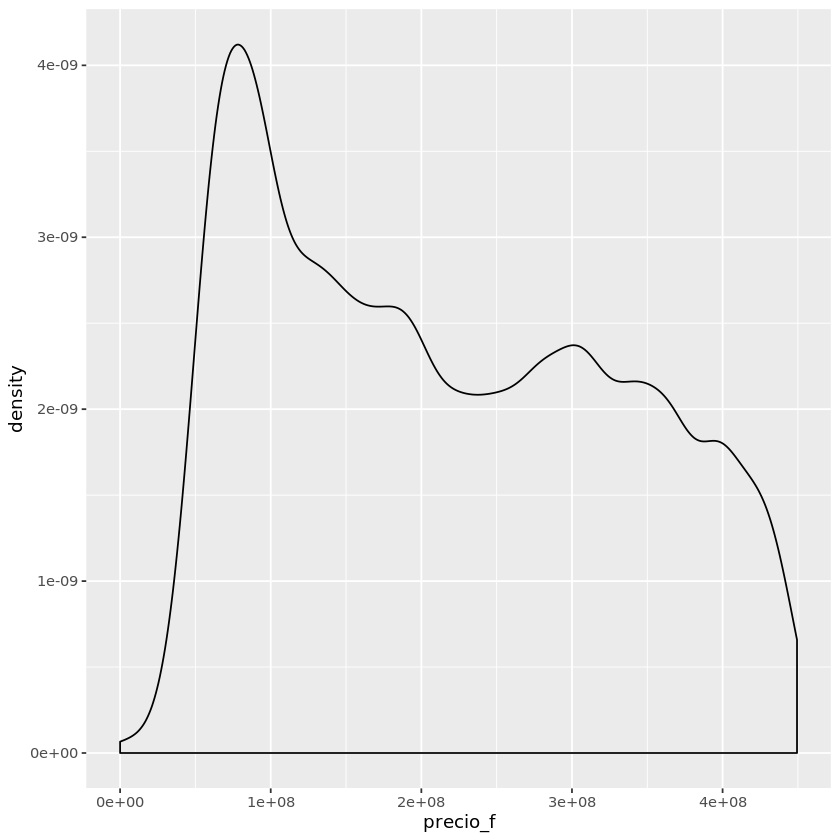

In [38]:
p = ggplot(datos, aes(x=precio_f)) + 
  geom_density()
p

Warning message:
“Removed 151 rows containing missing values (geom_point).”


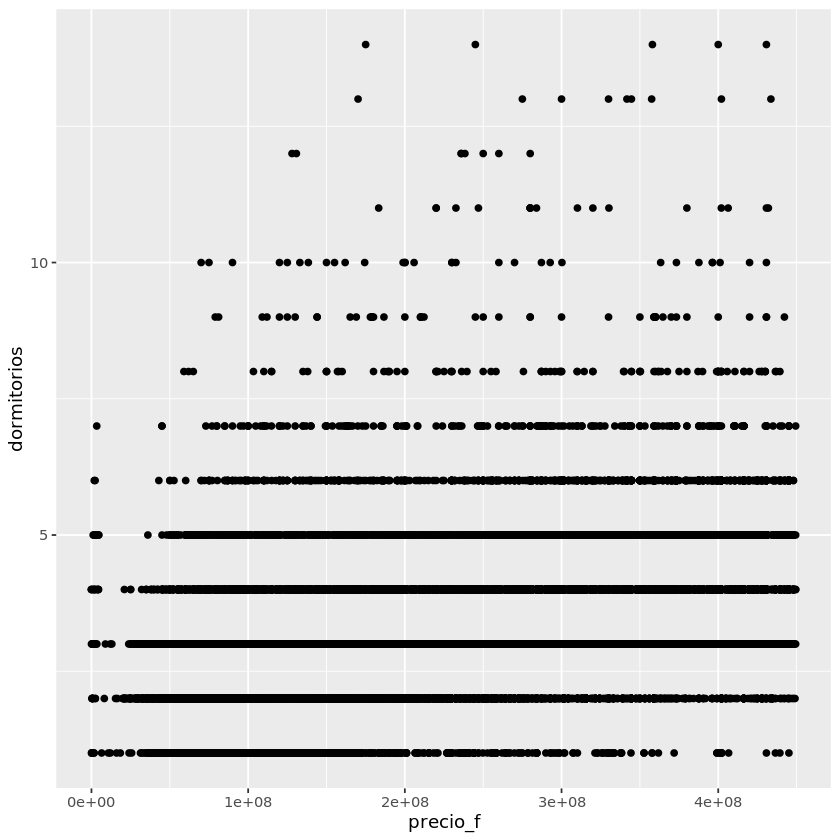

In [44]:
ggplot(datos, aes(x=precio_f, y=dormitorios )) + geom_point()

In [ ]:
p<-ggplot(datos, aes(x=dormitorios, y=precio_f, fill=dormitorios)) +
  geom_boxplot()+scale_fill_brewer(palette="Dark2")
p

## 3. Definición muestra

Definir de acuerdo lo inspeccionado anteriormente cual será su muestra final posterior a los filtros pertinentes y a su estrategia de validación que utilizarán para el modelo a estimar. Argumentar las decisiones tomadas en este punto.

In [5]:
# Código aqui


## 4. Estimación de modelo

Elección de la metodología de modelamiento y su razón. Estimar el modelo 

In [ ]:
# Código aqui

## 5. Evaluación del modelo

Elección de las métricas a utilizar para evaluar el rendimiento del modelo asi como la justificación de la elección de métricas utilizadas

In [ ]:
# Código aqui

## 6. Reflexiones finales

Reflexiones finales respecto al proceso de modelamiento, potenciales mejoras, bases adicionales interesantes que se podrían ocupar para generar nuevas variables, etc.